## EDA NOtebook

In [261]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point
from shapely.geometry import shape 
from shapely.geometry import Polygon
from descartes import PolygonPatch
from matplotlib import pyplot
import matplotlib.pyplot as plt

import cfgrib
from collections import Counter
import pickle

In [408]:
## load in data from data prpocessing
fire_data = pd.read_csv('Fire_regions_w_r')
fire_data

,Unnamed: 0,ALARM_DATE,GIS_ACRES,long,lat,Eco_Region,u10,v10,t2m,stl1,Classes
0,0,2007-10-21,25.73670,-118.496607,34.381640,6,-2.150987,-4.989490,287.876770,288.388916,0
1,1,2007-10-22,2824.88000,-118.619628,34.405067,6,-3.168478,-4.262221,291.141541,290.155029,2
2,2,2007-10-20,58410.30000,-118.757048,34.499173,6,0.252504,-2.009733,287.955566,287.808228,3
3,3,2007-09-11,172.21500,-118.063284,34.506141,4,0.073152,0.294251,295.471497,294.271423,0
4,4,2007-05-19,2373.84000,-118.812542,34.758866,6,-0.783942,0.899935,288.027161,288.846619,2
...,...,...,...,...,...,...,...,...,...,...,...
9010,9010,2019-10-10,80.32770,-118.959240,34.148530,6,-1.054124,1.073116,290.747437,293.034363,0
9011,9011,2019-10-21,42.28260,-118.553277,34.059152,6,-0.477139,-2.543455,290.651184,290.919922,0
9012,9012,2019-10-30,6.29773,-118.674104,34.150865,6,-3.460055,-4.287656,284.759064,286.267578,0
9013,9013,2019-10-28,8.48267,-118.695438,34.148867,6,-1.826030,-3.613246,286.134644,287.730652,0


In [265]:
## load iin shapefiles
eco_regions_shape_map_path = 'eco_regions_qgis_l4.shp'
eco_regions_shape_map = gpd.read_file(eco_regions_shape_map_path)

cal_fires_shape_map_path = 'Cal_fires.shp'
cal_fires_shape_map = gpd.read_file(cal_fires_shape_map_path)

### List of questions to ask/ visulations needed to understand data 

    - Fires by date
    - Fires by date by class
    - Fires per ecoregion
    - Fires per ecoregion as a ratio of total area (cal area = 163,696 square miles (423,970 km2))
    - Large fires per eco region per class as a ratio of total area 
    - make an average across all fires than look at how far the classes devaite in distance from that average 

In [9]:
## look at area of shape files
sum(eco_regions_shape_map.Shape_Area.tolist())/1000000

409597.0401913525

## Histogram Fire Sizes

(array([8.118e+03, 3.220e+02, 1.430e+02, 8.800e+01, 5.600e+01, 4.600e+01,
        3.000e+01, 2.200e+01, 1.800e+01, 1.500e+01, 1.300e+01, 1.000e+01,
        1.000e+01, 1.100e+01, 1.100e+01, 1.100e+01, 6.000e+00, 6.000e+00,
        4.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        4.000e+00, 7.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

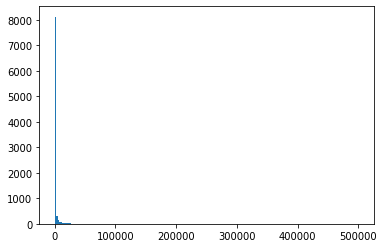

In [306]:
fire_size = fire_data.GIS_ACRES.tolist()
fire_data[fire_data['GIS_ACRES'] > 10000]
plt.hist(fire_size, bins = 200)

## Fires by Date

In [20]:
dates = fire_data.ALARM_DATE
dates_months = []
for i in dates:
    dates_months.append(int(i[5:7]))

In [45]:
print(Counter(dates_months).keys()) # months
print(Counter(dates_months).values()) # counts 

dict_keys(['10', '09', '05', '07', '08', '06'])
dict_values([732, 1347, 720, 2418, 2062, 1736])


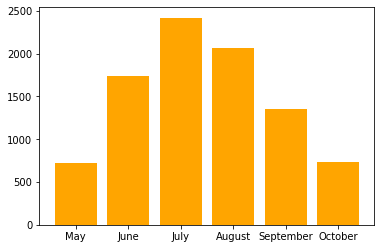

In [385]:
# Plotting fires by month
months = ['May','June','July','August','September','October']
fires_per_month = [720,1736,2418,2062,1347,732]
plt.bar(months, fires_per_month, color = 'orange')
plt.savefig('Fires_by_month',dpi = 300, transparent = True)

## Fires Per Ecoregion

In [369]:
eco_region = fire_data.Eco_Region.tolist()

In [70]:
eco_regions_types = list(Counter(eco_region).keys()) # ecoregion
eco_regions_counts = list(Counter(eco_region).values()) # eco region counts
eco_regions_types
# converting ecoregions into 1-13 count
eco_regions_types_conv = [4,2,10,7,5,1,13,3,6,8,9,12,11]

<BarContainer object of 13 artists>

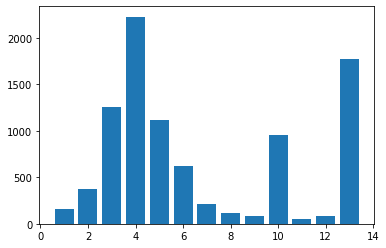

In [71]:
plt.bar(eco_regions_types_conv, eco_regions_counts)

## Fires Per ECoregion per area 

In [75]:
eco_region_classes = pickle.load( open( "eco_region_classes", "rb" ) )

In [77]:
eco_regions_shape_map['Base_Regions'] = eco_region_classes

In [367]:
## getting area per ecoregion
area_list = eco_regions_shape_map.Shape_Area.tolist()
area1 = 0
area2 = 0
area3 = 0
area4 = 0
area5 = 0
area6 = 0
area7 = 0
area8 = 0
area9 = 0
area10 = 0
area11 = 0
area12 = 0
area13 = 0
for i in range(len(eco_regions_shape_map)):
    if int(eco_region_classes[i]) == 1:
         area1 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 4:
         area2 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 5:
         area3 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 6:
         area4 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 7:
         area5 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 8:
         area6 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 9:
         area7 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 13:
         area8 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 14:
         area9 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 78:
         area10 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 80:
         area11 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 81:
         area12 += area_list[i]/1000000
    elif int(eco_region_classes[i]) == 85:
         area13 += area_list[i]/1000000

In [375]:
eco_regions_counts = list(Counter(eco_region).values())
print(list(Counter(eco_region).keys())) 
print(eco_regions_counts)
eco_counts_ordered = [209,371,1260,2226,1114,626,209,112,81,954,50,87,1768]

[6, 4, 78, 9, 7, 1, 85, 5, 8, 13, 14, 81, 80]
[2226, 371, 954, 209, 1114, 157, 1768, 1260, 626, 112, 81, 87, 50]


In [92]:
# [4,2,10,7,5,1,13,3,6,8,9,12,11]
eco_region_areas = [76678.7199, 13899.7443, 32779.1236, 17660.1209, 46490.2030, 
                    13328.3889, 20955.4590, 52119.9807, 15837.8427, 12591.7992, 
                    74772.2336, 28521.1121, 3962.3117]

In [95]:
eco_regions_fires_per_area = []
for i in range(len(eco_region_areas)):
    area_per = eco_regions_counts[i]/eco_region_areas[i]
    eco_regions_fires_per_area.append(area_per)

<BarContainer object of 13 artists>

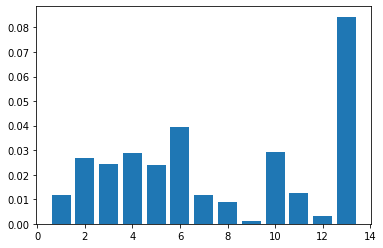

In [96]:
plt.bar(eco_regions_types_conv, eco_regions_fires_per_area)

In [344]:
regions = sorted(fire_data.Eco_Region.unique())
regions1 = fire_data.Eco_Region
eco_region3_count = []
count = 0
for i in regions:
    for j in range(len(fire_data)):
        if classes[j] == 3 and regions1[j] == i:
             #fire_years.append(fire_classes[k])
            count += 1
    eco_region3_count.append(count)
    count = 0
    

[19, 28, 64, 150, 59, 52, 19, 14, 5, 52, 6, 5, 102]
575
0.5495652173913044
0.8295652173913044


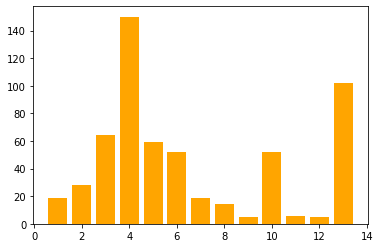

In [392]:
print(eco_region3_count)
print(sum(eco_region3_count))
print(316/575)
print(477/575)
list1 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.bar(list1,eco_region3_count, color = 'orange')
plt.savefig('Large_Fires_by_eco_region',dpi = 300, transparent = True)

In [352]:
eco_regions_fires_per_area3 = []
for i in range(len(eco_region_areas)):
    area_per = eco_region3_count[i]/eco_region_areas[i]
    eco_regions_fires_per_area3.append(area_per)

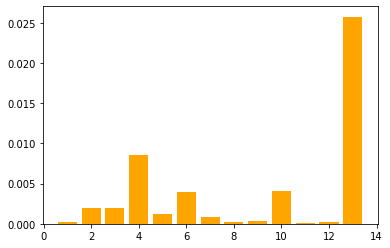

In [391]:
plt.bar(list1,eco_regions_fires_per_area3, color = 'Orange')
plt.savefig('Large_Fires_by_eco_region_per_area',dpi = 300, transparent = True)

In [389]:
print(eco_regions_counts)
print(eco_region3_count)
classg_ratio = []
for i in range(len(eco_region_areas)):
    area_per = eco_region3_count[i]/eco_counts_ordered[i]
    classg_ratio.append(area_per)

[2226, 371, 954, 209, 1114, 157, 1768, 1260, 626, 112, 81, 87, 50]
[19, 28, 64, 150, 59, 52, 19, 14, 5, 52, 6, 5, 102]


<BarContainer object of 13 artists>

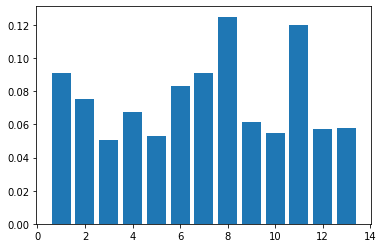

In [390]:
plt.bar(list1,classg_ratio)

## Fires per eco region per class

In [275]:
#finds class counts for each ecoregion 
regions_list = fire_data.Eco_Region.tolist()
fire_classes = fire_data.Classes.tolist()
index = []
class_sep = []
for i in [1,4,5,6,7,8,9,13,14,78,80,81,85]:
    for k in range(len(regions_list)):
        if regions_list[k] == i:
            index.append(fire_classes[k]) 
    class_sep.append(index)
    index = []

In [425]:
ind = 12
fire_class_pr = Counter(class_sep[ind]).keys() # equals to list(set(words))
fire_class_pr_count = Counter(class_sep[ind]).values() # counts the elements' frequency

<BarContainer object of 4 artists>

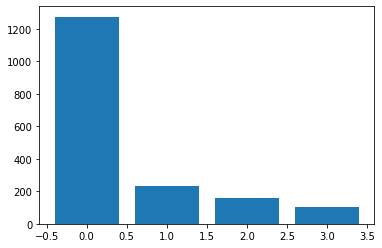

In [426]:
plt.bar(fire_class_pr, fire_class_pr_count)

## Create Standard Line 
make an average across all fires than look at how far the classes devaite in distance from that average

In [283]:
# creating list of wind magnitudes
u10 = fire_data.u10.tolist()
v10 = fire_data.v10.tolist()

In [284]:
# wind speed calc
wind_vel = []
for i in range(len(u10)):
    wind_vel.append(np.sqrt(u10[i]**2 + v10[i]**2))

In [285]:
# wind speed not velicty, mislabled
fire_data['Wind_Velocity'] = wind_vel

In [295]:
# creates the values fro avg temp, avg soil temp and avg wind speed across all fires
t2m = fire_data.t2m.tolist()
stl1 = fire_data.stl1.tolist()
avg_temp = 0
avg_soil_temp = 0
avg_wind_vel =0
for i in range(len(u10)):
    avg_temp += t2m[i]/len(t2m)
    avg_soil_temp += stl1[i]/len(t2m)
    avg_wind_vel += wind_vel[i]/len(t2m)

In [296]:
# this calculates teh distance from a fire to the avgerages, with directionality, so we can have a negative distance
dist_from_avg = []
for i in range(len(u10)):
    if t2m[i]-avg_temp > 0 and stl1[i]-avg_soil_temp > 0 and wind_vel[i]-avg_wind_vel > 0:
        dist_from_avg.append(np.sqrt((t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2))
    elif t2m[i]-avg_temp > 0 and stl1[i]-avg_soil_temp > 0 and wind_vel[i]-avg_wind_vel < 0:
        if ((t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2) > 0:
            dist_from_avg.append(np.sqrt((t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute((t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp > 0 and stl1[i]-avg_soil_temp < 0 and wind_vel[i]-avg_wind_vel > 0:
        if ((t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2) > 0:
            dist_from_avg.append(np.sqrt((t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute((t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp < 0 and stl1[i]-avg_soil_temp > 0 and wind_vel[i]-avg_wind_vel > 0:
        if (-(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2) > 0:
            dist_from_avg.append(np.sqrt(-(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute(-(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp > 0 and stl1[i]-avg_soil_temp < 0 and wind_vel[i]-avg_wind_vel < 0:
        if (t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2 > 0:
            dist_from_avg.append(np.sqrt((t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute((t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp < 0 and stl1[i]-avg_soil_temp > 0 and wind_vel[i]-avg_wind_vel < 0:
        if -(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2 > 0:
            dist_from_avg.append(np.sqrt(-(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute(-(t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 - (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp < 0 and stl1[i]-avg_soil_temp < 0 and wind_vel[i]-avg_wind_vel > 0:
        if -(t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2 > 0:
            dist_from_avg.append(np.sqrt(-(t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2))
        else:
            dist_from_avg.append(-np.sqrt(np.absolute(-(t2m[i]-avg_temp)**2 - (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2)))
    elif t2m[i]-avg_temp < 0 and stl1[i]-avg_soil_temp < 0 and wind_vel[i]-avg_wind_vel < 0:
        dist_from_avg.append(-np.sqrt((t2m[i]-avg_temp)**2 + (stl1[i]-avg_soil_temp)**2 + (wind_vel[i]-avg_wind_vel)**2))

In [299]:
# looking at counts by classes for differnce distances from teh standard line 
dist10 = []
dist5 = []
dist0 = []
distn5 = []
distn10 =[]
for i in range(len(fire_classes)):
    if dist_from_avg[i] > 10:
        dist10.append(fire_classes[i])
    elif dist_from_avg[i] > 5 and dist_from_avg[i] <= 10:
        dist5.append(fire_classes[i])
    elif dist_from_avg[i] > 0 and dist_from_avg[i] <= 5:
        dist0.append(fire_classes[i])
    elif dist_from_avg[i] > -5 and dist_from_avg[i] <= 0:
        distn5.append(fire_classes[i])
    elif dist_from_avg[i] < -5:
        distn10.append(fire_classes[i])

In [300]:
print(Counter(dist10).keys()) # equals to list(set(words))
print(Counter(dist10).values()) # counts the elements' frequency

print('5')
print(Counter(dist5).keys()) # equals to list(set(words))
print(Counter(dist5).values()) # counts the elements' frequency

print('0')
print(Counter(dist0).keys()) # equals to list(set(words))
print(Counter(dist0).values()) # counts the elements' frequency

print('n5')
print(Counter(distn5).keys()) # equals to list(set(words))
print(Counter(distn5).values()) # counts the elements' frequency

print('n10')
print(Counter(distn10).keys()) # equals to list(set(words))
print(Counter(distn10).values()) # counts the elements' frequency

dict_keys([0, 3, 1, 2])
dict_values([307, 53, 62, 47])
5
dict_keys([0, 1, 3, 2])
dict_values([1196, 266, 141, 198])
0
dict_keys([2, 0, 3, 1])
dict_values([293, 1774, 156, 366])
n5
dict_keys([0, 1, 3, 2])
dict_values([1471, 355, 119, 252])
n10
dict_keys([3, 2, 0, 1])
dict_values([106, 193, 1345, 315])


## Class G fires by year

In [308]:
# looking at class g fires counts from 1980 to 2019
year_list = []
for i in range(len(fire_data)):
    year_list.append(int(fire_data.ALARM_DATE[i][0:4]))

In [311]:
fire_data['Year'] = year_list

In [327]:
years = fire_data.Year.unique()
years = sorted(years)

In [326]:
classG_yr = []
count = 0
for i in years:
    for j in range(len(fire_data)):
        if classes[j] == 3 and year_list[j] == i:
             #fire_years.append(fire_classes[k])
            count += 1
    classG_yr.append(count)
    count = 0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


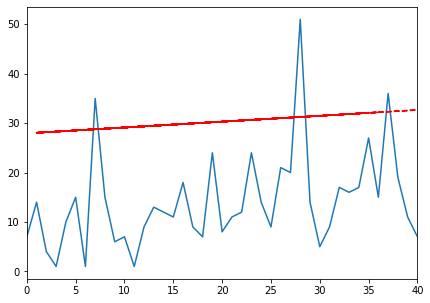

In [383]:
# plot of teh graph with best fit line, that doesnt fit 
plt.figure(figsize=(7,5))
y = []
for i in range(len(classG_yr)):
    y.append(i)
print(y)
plt.plot(classG_yr)
z = np.polyfit(classG_yr, y, 1)
p = np.poly1d(z)
plt.plot(classG_yr,p(classG_yr),"r--")
plt.xlim(0,40)
plt.savefig('ClassGfiresOverTime')

## Wind Speed

In [417]:
# looks at average wind speed per class
wind_spe = []
u10 = fire_data.u10.tolist()
v10 = fire_data.v10.tolist()
for i in range(len(fire_data)):
     wind_spe.append(np.sqrt(u10[i]**2 + v10[i]**2))

In [418]:
fire_data['Wind_spe'] = wind_spe

In [421]:
# creates average fro each class
wind_by_class = []
wind_avg = 0

for i in [0,1,2,3]:
    temp_df = fire_data[fire_data['Classes'] == i]
    wind_avg = sum(temp_df.Wind_spe.tolist())/len(temp_df)
    wind_by_class.append(wind_avg)
    wind_avg = 0

In [422]:
wind_by_class

[1.1507191299756185, 1.0939101814814551, 1.1758582509455366, 1.183371511931756]

<BarContainer object of 4 artists>

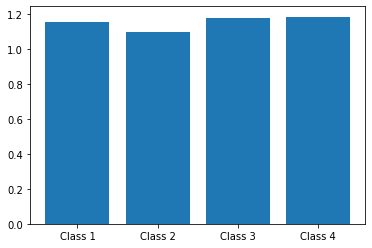

In [423]:
# plot of average winnd speeds per class
plt.bar(['Class 1','Class 2','Class 3','Class 4'], wind_by_class)